# DEEP LEARNING PARA EL ANÁLISIS DE IMÁGENES

# PARTE 1: DEFINICIONES Y MODELIZACIÓN BÁSICA

Machine Learning  - Master en Data Science CUNEF

Gerardo Ramis y Álvaro Rodríguez

## 1) Objetivos

Este documento pretende servir de introducción y toma de contacto con las Redes Neuronales Convolucionales. Los principales objetivos que se pretende cumplir son:

- Definir este tipo de redes neuronales, sus carácterísticas y su modo de empleo habitual.
- Emplear estas herramientas en un caso práctico sencillo.
- Definir y justificar los modelos empleados.
- Mostrar detalladamente los resultados obtenidos con el uso de Redes Neuronales Convolucionales.

## 2) Introducción

### A) Capas (Layers)


La estructura de datos fundamental en las redes neuronales son las capas. Una capa es un módulo de procesamiento de datos que toma como entrada uno o más tensores y que genera uno o más tensores. 

Una capa es un contenedor que normalmente recibe una entrada ponderada, la transforma con un conjunto de funciones en su mayoría no lineales y luego pasa estos valores como salida a la siguiente capa. Una capa suele ser uniforme, es decir, solo contiene un tipo de función de activación, agrupación, convolución, etc., de modo que se pueda comparar fácilmente con otras partes de la red. Las capas primera y última de una red se denominan capas de entrada y salida, respectivamente, y todas las capas intermedias se denominan capas ocultas.

La capa apropiada para aplicar en cada caso depende de los diferentes formatos de tensor y diferentes tipos de procesamiento de datos. Por ejemplo, datos vectoriales simples, almacenados en tensores 2D de forma (muestras, características), a menudo se procesa mediante capas densamente conectadas ("fully connected","dense" en keras).

Los datos de imagen, almacenados en tensores 4D, generalmente se procesan mediante capas de convolución 2D (Conv2D).

### B) Redes Neuronales Convolucionales.

Las redes neuronales convolucionales (CNN) son una categoría de redes neuronales que han demostrado ser **muy eficaces en áreas como el reconocimiento y la clasificación de imágenes**. CNN ha tenido éxito, entre otros, en la identificación de rostros, objetos y señales de tráfico.

La diferencia fundamental entre una capa densamente conectada y una capa de convolución es la siguiente: las capas densas aprenden patrones globales en su espacio de características de entrada (por ejemplo, para un dígito MNIST, patrones que involucran todos los píxeles), mientras que las capas de convolución aprenden patrones locales. En el caso de imágenes, patrones encontrados en pequeñas ventanas 2D de las entradas.

Tiene algunas características muy interesantes:

 - **Los patrones que aprenden no varían con la traducción**. Después de aprender un cierto patrón en la esquina inferior derecha de una imagen, un convnet puede reconocerla en cualquier lugar. Ejemplo: en la esquina superior izquierda, una red densamente conectada, tendría que aprender el patrón de nuevo si apareciera en una nueva ubicación. Esto hace que los convnets sean muy eficientes al procesar imágenes (porque el mundo visual es fundamentalmente traducción invariante): necesitan menos muestras de entrenamiento para aprender representaciones y tienen poder de generalización.
 
- **Pueden aprender jerarquías espaciales de patrones**. Una primera capa de convolución aprenderá pequeños patrones locales como los bordes, una segunda capa de convolución lo hará con patrones más grandes hechos de las características de las primeras capas, y así sucesivamente. Esta permite a los usuarios aprender de manera eficiente conceptos visuales cada vez más complejos y abstractos (porque el mundo visual es fundamentalmente jerárquico espacialmente).


Las convoluciones funcionan sobre tensores 3D, llamados **mapas de características**, con dos ejes espaciales (altura y ancho), así como un eje de profundidad (también llamado eje de canales). Para una imagen en blanco y negro, la profundidad es 1 (niveles de gris). La operación de convolución extrae parches de su función de entrada, mapea y aplica la misma transformación a todos estos parches, produciendo como salida, un mapa de características que sigue siendo un tensor 3D: tiene un ancho y una altura. La profundidad puede ser arbitraria, ya que la profundidad de salida es un parámetro de la capa y los diferentes canales en ese eje de profundidad ya no representan colores específicos, más bien, representan los filtros. 

Los **filtros** codifican aspectos específicos de los datos de entrada: un filtro de alto nivel podría codificar el concepto "presencia de una cara en la entrada" por ejemplo.

Únicamente se utilizan modelos secuenciales, que son los más habituales en este tipo de redes. Computacionalmente este tipo de procedimientos son muy intensivos.

![title](images/CNN_2.png)

## 3) PROCEDIMIENTO

Las Redes Neuronales Convolucionales han ganado mucha popularidad en relación a su utilidad con datos de imágenes. Nos ayuda a detectar qué es una imagen o qué contiene esa imagen.

La estructura básica de una red neuronal CNN es la siguiente:

**Convolución -> Pooling -> Convolución -> Pooling -> Red densamente conectada -> Resultado**

Seguidamente se definen y repasan cada una de estas acciones, aplicando una Red Neuronal Convolucional a los datos de la libraria MNIST. Es un conjunto de imagenes (28x28 pixeles) que contienen dígitos escritos a mano, de 0 a 9.

In [116]:
# Paquetes
from __future__ import print_function
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.metrics import categorical_accuracy
from tensorflow.python.keras.models import model_from_json
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

from tensorflow.python.keras.optimizers import *
from tensorflow.python.keras.layers.normalization import BatchNormalization

# viz
import matplotlib.pyplot as plt
import seaborn as sns

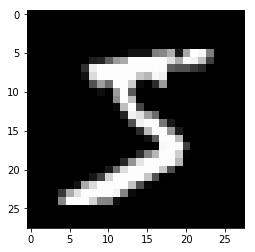

In [117]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0],cmap="gray")
plt.show()

[7 2 1 ... 4 5 6]


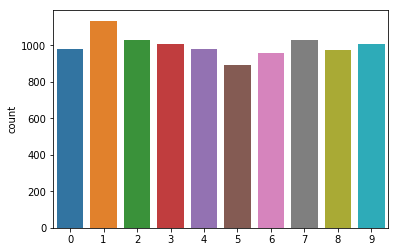

In [118]:
# balanceo de la muesta
sns.countplot(test_labels)
print(test_labels)

### A) Convolución

La convolución es el acto de tomar los datos originales y crear mapas de características a partir de ellos. Como anteriormente se ha descrito, las capas convolucionales no están completamente conectadas como una red neuronal tradicional.

Es importante destacar que un convnet toma tensores de entrada de la forma: (image_height, image_width, image_channels). En este caso, configuraremos el convnet para procesar entradas de tamaño (28, 28, 1), que es el formato de las imágenes MNIST. Lo haremos pasando el argumento input_shape = (28, 28, 1) a la primera capa. 28x28 corresponde al número de pixeles de la imágenes del dataset, 1 corresponde al canal de colores Escala de Grises.

Las convoluciones se definen por dos parámetros clave:
    
 - Tamaño de los parches extraídos de las entradas: generalmente son 3 × 3 o 5 × 5.
 
- Profundidad del mapa de características de salida: la cantidad de filtros calculados por la convolución. El modelo comenzará con una profundidad de 32 y terminará con una profundidad de 64.

En las capas Keras Conv2D, estos parámetros son los primeros argumentos pasados a la capa:

Conv2D (output_depth, (window_height, window_width)).

#### A.1) Función de Activación

Para poder acceder a un espacio de hipótesis óptimo para representaciones profundas, se necesita una función no lineal o de activación. **relu** es un tipo de función de activación que sirve para rectificar la unidad lineal (su nombre es abreviatura de rectificado lineal). Matemáticamente, se define como: y = max (0, x). Es la función de activación más popular en el aprendizaje profundo, especialmente en CNN.

Sin una función de activación como relu (también llamada no linealidad), la capa Densa o Convolucional consistiría en dos operaciones lineales. Así que la capa solo podría aprender transformaciones lineales (transformaciones afines) de los datos de entrada.

### B) Pooling (reducción)

El Pooling es un procedimiento que toma la entrada en un área determinada y la reduce a un solo valor (submuestreo). En las redes neuronales convolucionales, esta concentración de información tiene la propiedad útil de que las conexiones salientes generalmente reciben información similar (la información se "canaliza" al lugar correcto para el mapa de características de entrada de la siguiente capa convolucional). Esto proporciona invariancia básica a rotaciones y traducciones. Por ejemplo, si la cara en un parche de imagen no está en el centro de la imagen pero se capta ligeramente, aún podría funcionar igualmente bien, ya que la información se podría canalizar en el lugar correcto mediante la operación de agrupación para que los filtros convolucionales puedan detectar la cara.

El objetivo de utilizar el submuestreo (pooling) es el de reducir el número de coeficientes del mapa de características a procesar, así como el de inducir jerarquías de filtros espaciales haciendo que las capas de convolución sucesivas abarquen ventanas cada vez más grandes (en términos de la fracción de la entrada original que cada uno de ellos cubre).

Cuanto mayor es el tamaño del área de agrupación, más información se condensa, lo que conduce a redes delgadas. Sin embargo, si el área de agrupación es demasiado grande, se desecha demasiada información y disminuye el rendimiento predictivo.

Una gran diferencia de la convolución es que el max-pooling se realiza generalmente con ventanas 2×2, para reducir la muestra de los mapas de características por un factor de 2. Por otra parte, la convolución se realiza normalmente con ventanas de 3×3. Por ello, una capa convolucional con un output 26x26, tras la aplicación de este procedimiento pasaría a tener un mapa de características de 13x13.


- Números Manuscritos (parte 1)

In [119]:
# Definición del modelo
# funciones de activación relu.
model = models.Sequential() # modelo secuencial
# Primera capa
# input conforme a los datos 28x28 pixeles, escala de grises y se aplican 32 filtros
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
# Reducción con max-pooling con ventanas 2x2
model.add(layers.MaxPooling2D((2, 2)))
# Segunda capa
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# tercera capa
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Puede verse que la salida ("Output Shape") de cada capa ("Layer (type)") Conv2D y MaxPooling2D es un tensor 3D de forma (altura, anchura, canales). 

La primera capa de convolución toma un mapa de características de tamaño (28, 28, 1) y genera un mapa de características de tamaño (26, 26, 32): calcula 32 filtros sobre su entrada. 

Cada uno de estos 32 canales de salida contiene una cuadrícula de valores de 26 × 26, que es una mapa de respuesta del filtro sobre la entrada, que indica la respuesta de ese patrón de filtro en diferentes ubicaciones en la entrada.

Las dimensiones de anchura y altura tienden a reducirse, por la creación de una imagen de una pequeña CNN a medida que profundiza en la red. El número de filtros es controlado por el primer argumento pasado a las capas Conv2D (32 en la primera capa del modelo, 64 en las dos últimas).

### C) Red Densamente Conectada

Las capas densamente conectadas (Fully Connected o Dense) son las redes neuronales más típicas, donde **todos los nodos están completamente conectados**.

En el ejemplo, se define una secuencia de dos capas que están densamente conectadas, es decir, que todas las neuronas de cada capa están conectadas con todas las neuronas de la capa siguiente.

Antes de proceder con estas capas se necesita tomar el mapa de característica devuelto en la última capa y convertirlo en un plano, en este caso de 1x576. Para ello, se utiliza **Flatten** de la librería Keras. Esto servirá como capa de entrada a las redes densamente conectadas.

Se aplica la capa Dense con 64 unidades. La función de activación es relu.

Por último, se procede con la capa de salida, igualmente una capa Dense, con 10 nodos, 1 por cada posible predicción. En este caso, nuestra función de activación es una función softmax, ya que en realidad estamos buscando algo más parecido a una distribución de probabilidad de cuál de las posibles opciones de predicción está pasando.

- Números Manuscritos (parte 2)

In [120]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                36928     
__________

### D) Compilación

Es en este paso donde se establece la configuración para optimizar el modelo que hemos definido.

#### D.1) Optimizador

El algoritmo de optimización de **Adam** es una extensión del descenso de gradiente estocástico que recientemente ha visto una adopción más amplia para aplicaciones de aprendizaje profundo en visión computacional y procesamiento de lenguaje natural.

El descenso de gradiente estocástico mantiene una tasa de aprendizaje única (denominada alfa) para todas las actualizaciones de peso y la tasa de aprendizaje no cambia durante el entrenamiento.

Adam es un algoritmo para la optimización basada en gradientes de primer orden de funciones objetivo estocásticas, basado en estimaciones adaptativas de momentos de orden inferior. El método es sencillo de implementar, es computacionalmente eficiente, tiene pocos requisitos de memoria, es invariante para el reescalado diagonal de los gradientes y es adecuado para problemas que son grandes en términos de datos y / o parámetros. 

El método también es apropiado para objetivos no estacionarios y problemas con gradientes muy ruidosos y / o dispersos.

#### D.2) Función de perdida

Igualmente, es preciso establecer una métrica de pérdida. La pérdida es un cálculo de error. Una red neuronal en realidad no intenta maximizar la precisión. Intenta minimizar la pérdida. Nuevamente, hay muchas opciones, pero alguna forma de crossentropy categórica es un buen comienzo para una tarea de clasificación como esta.

#### D.3) Batchs (lotes)

El tamaño del lote ("batch size") define el número de muestras que se propagarán a través de la red definida anteriomente.

Por ejemplo, si se tuvieran 1050 muestras de entrenamiento y  se configura un batch size igual a 100, el algoritmo toma las primeras 100 muestras (del 1 al 100) de los inputs y entrena la red. A continuación, toma las segundas 100 muestras (de 101 a 200) y vuelve a entrenar la red. Podemos seguir haciendo este procedimiento hasta que se alcancen todas las muestras de la red.

#### D.4) Epochs

Un cut-off arbitrario, que consiste en un recorrido de todos los datos, utilizado para separar la muestra de entrenamiento en distintas fases, lo que es útil para el registro y la evaluación periódica.

- Números Manuscritos (parte 3)

In [124]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1698 - acc: 0.9471
Epoch 2/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0451 - acc: 0.9862
Epoch 3/5
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0316 - acc: 0.9902
Epoch 4/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0248 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0193 - acc: 0.9940: 


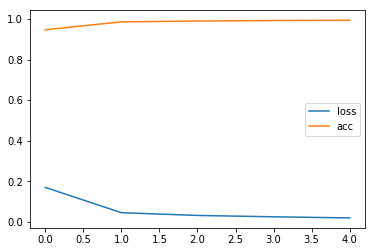

In [125]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.plot()

#### E) Testing

En este punto ya se ha entrenado la red neuronal y ahora se puede evaluar cómo se comporta con datos nuevos de prueba (test) con el método evaluate(). Que indican cómo de bien o mal se comporta nuestro modelo con datos nuevos que nunca ha visto (que hemos almacenado en test_images y test_labels.

In [126]:
val_loss, val_acc = model.evaluate(test_images, test_labels)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 5s 465us/step
0.028225709816145174
0.9921


In [127]:
# salvamos el modelo
model.save('lector_numeros.model')

#### F) Resultados

Para finalizar, seguimos el procedimiento con uno de los datos del dataset, para revisar los resultados que arroja el modelo y la forma en que lo hace, dibujamos la matriz de confusión y revisamos los errores.

#### F.1) Comprobar clasificación número aleatorio

Vamos a ver una imagen aleatoria (número 28) para poder comprobar si el modelo realiza la predicción correctamente.

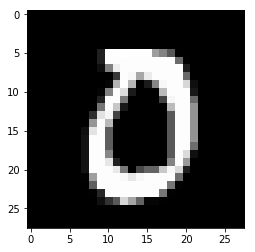

In [140]:
plt.imshow(test_images[28][:,:,0],cmap="gray")
plt.show()

In [130]:
predictions = model.predict(test_images)
print("La predicción para la imagen anterior es", np.argmax(predictions[28]))

La predicción para la imagen anterior es 0


In [131]:
# El modelo da como resultado cero con contundencia. La suma de todos los valores para cada posible output es igual a 1.
print(predictions[28])

[9.9999988e-01 3.8131247e-12 1.7183497e-08 1.7437749e-09 1.0825528e-09
 6.7485723e-10 1.3744418e-09 6.2472476e-09 7.0931421e-09 1.2433530e-07]


#### F.1) Matriz de Confusión

Generamos una matriz de confusión para indagar acerca de los aciertos y errores que se han producido

In [132]:
# valores predichos 
y_predicted= np.argmax(predictions,axis = 1) 

# etiquetas
y_true = np.argmax(test_labels,axis = 1)

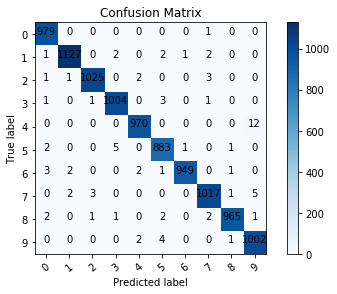

In [133]:
# confusion matrix

def plot_confusion_matrix(cm, rangee):

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xticks(rangee, rangee, rotation=40)
    plt.yticks(rangee, rangee)

   
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center")
                

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# confusion matrix
conf_matrix = confusion_matrix(y_true, y_predicted) 
#print(conf_matrix)

# plot the confusion matrix
plot_confusion_matrix(conf_matrix, rangee = range(10))

#### F.2) Errores de Clasificación

Se revisan los errores de clasificación para revisar porque se han producido

In [134]:
error = y_true - y_predicted !=0
Y_true_err = y_true[error]
Y_pred_err = y_predicted[error]
X_val_err =  test_images[error]

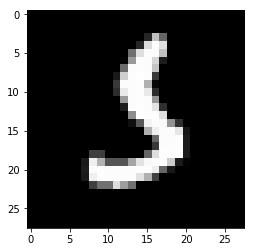

True Value:  5
Predicted Value:  3


In [135]:
# Revisamos el primer error cometido
num = 0

plt.imshow(X_val_err[num][:,:,0],cmap="gray")
plt.show()
print("True Value: ",Y_true_err[num] )
print("Predicted Value: ",Y_pred_err[num])

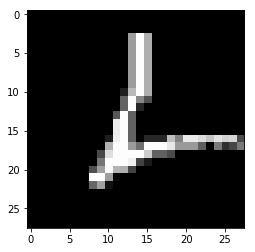

True Value:  2
Predicted Value:  4


In [136]:
# Revisamos el quinto error cometido
num = 5

plt.imshow(X_val_err[num][:,:,0],cmap="gray")
plt.show()
print("True Value: ",Y_true_err[num] )
print("Predicted Value: ",Y_pred_err[num])